In [2]:
import pandas as pd

df = pd.read_csv('../data/student/student-mat.csv', sep=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
X = df.filter(items=['studytime', 'age', 'absences', 'freetime', 'traveltime', 'failures', 'Medu', 'Fedu', 'famrel', 'goout', 'Dalc', 'Walc', 'health']).to_numpy()
Y = df.filter(items=['G3']).to_numpy()

In [4]:
X.shape, Y.shape

((395, 13), (395, 1))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((316, 13), (79, 13), (316, 1), (79, 1))

In [9]:
from neural_network import NeuralNetwork
from loss.mse import MSE
from layer import Layer
from activation.relu import ReLU
import numpy as np


nn = NeuralNetwork(MSE)
nn.add(Layer(13, 10))
nn.add(ReLU())
nn.add(Layer(10, 5))
nn.add(ReLU())
nn.add(Layer(5, 3))
nn.add(ReLU())
nn.add(Layer(3, 1))


print(nn)
losses = nn.train(X_train, Y_train, epochs=100000, learning_rate=0.001)
print(nn)

-----
Layer (13, 10)
Weights
[[-2.83494167e-02  9.45852992e-02  4.22366224e-03 -2.35984693e-02
   2.88468174e-02 -8.39326125e-02  4.33380861e-02 -1.07023023e-02
   7.82215196e-02 -4.31001713e-03]
 [ 7.27336578e-02 -1.24422168e-01 -5.05908969e-02 -1.47932592e-03
   7.83985371e-03 -5.39898234e-02  2.17220092e-02  3.55860648e-02
  -4.25490836e-02 -5.25075637e-02]
 [ 9.50631923e-03 -6.19554571e-02  3.01692816e-02  1.43259072e-04
  -9.00688962e-02 -1.06314815e-01  8.04564175e-02  2.15343359e-04
  -9.23741588e-02  8.35832835e-02]
 [-4.76268532e-02  7.49590139e-02  5.09158476e-02 -5.03944387e-02
  -2.65268845e-02  1.22813328e-01 -1.32772596e-01 -3.61722131e-02
  -2.21254609e-02  2.00049619e-02]
 [ 4.19173759e-02 -1.42611951e-01  1.13485092e-01 -1.04683621e-01
   1.17191660e-02  1.65336048e-02 -8.72824457e-02  8.84573760e-02
  -8.39875984e-02  9.57814635e-03]
 [-1.23174232e-01 -1.21194314e-01  5.83072424e-02 -8.86097468e-02
  -5.23766751e-02 -5.52148059e-02  3.56360407e-02  1.25483860e-01
  -3

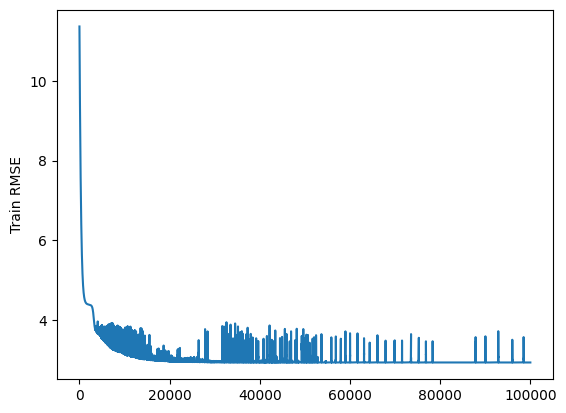

train: 2.206695088133406 2.932426197332754
test: 4.843090426280162 6.581019749260511


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from loss.mae import MAE

plt.ylabel('Train RMSE')
plt.plot(np.sqrt(losses))
plt.show()

prediction = nn.forward(X_test)
mse = MSE.loss(prediction, Y_test)
rmse = np.sqrt(mse)
mae = MAE().loss(prediction, Y_test)
print('train:', MAE().loss(nn.forward(X_train), Y_train), np.sqrt(MSE.loss(nn.forward(X_train), Y_train)))
print('test:', mae, rmse)